# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_unit = "imperial"



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_unit}&q="
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# URL for api call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


city_name = []
cloudiness = []
country = []
date = []
humidity = []
lats = []
lngs = []
max_temp = []
wind_speed = []

counter = 0

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        #response = requests.get(url + city.replace(" ","&")).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {counter} | {city_record}")
        print(f"{url}&q={city}")
        
        counter = counter + 1
        #return
    except:
        print("City not found. Skipping...")
        #break
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 0 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=cape town
Processing Record 1 | Chagoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=chagoda
Processing Record 2 | Vinh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=vinh
Processing Record 3 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=tuktoyaktuk
Processing Record 4 | Badalona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=badalona
Processing Record 5 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=chokurdakh
Processing Record 6 | George Town
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 56 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=saint-philippe
Processing Record 57 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=hithadhoo
Processing Record 58 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=arraial do cabo
Processing Record 59 | Carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=carutapera
Processing Record 60 | Paraíso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=paraiso
Processing Record 61 | Sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=sinnamary
Processing Record 62 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b

Processing Record 112 | Khasan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=khasan
Processing Record 113 | Constitución
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=constitucion
Processing Record 114 | Shaowu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=shaowu
Processing Record 115 | Muskegon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=muskegon
Processing Record 116 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=tasiilaq
Processing Record 117 | Naco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=naco
Processing Record 118 | Alyangula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=a

Processing Record 168 | Bucerías
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=bucerias
Processing Record 169 | Mossamedes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=namibe
City not found. Skipping...
Processing Record 170 | El Paujíl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=el paujil
Processing Record 171 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=nanortalik
Processing Record 172 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=port hardy
Processing Record 173 | Skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=skibbereen
Processing Record 174 | Salamiyah
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 223 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=kaitangata
Processing Record 224 | Puerto Escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=puerto escondido
Processing Record 225 | Namtsy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=namtsy
Processing Record 226 | Coahuayana Viejo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=coahuayana
Processing Record 227 | Kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=kahului
Processing Record 228 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=kruisfontein
City not found. Skipping...
Processing Record 229 | Prieska
http://api.openweathermap.org/data/2.5

Processing Record 279 | Jalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=jalu
Processing Record 280 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=saint-augustin
Processing Record 281 | Nexø
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=nexo
City not found. Skipping...
Processing Record 282 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=ilulissat
Processing Record 283 | Puerto Maldonado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=puerto maldonado
Processing Record 284 | Alice Springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=alice springs
Processing Record 285 | Anadyr
http://api.openweathermap.org/data/2.5/weather?

Processing Record 334 | Simbahan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=simbahan
City not found. Skipping...
Processing Record 335 | Vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=vao
Processing Record 336 | Severnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=severnoye
City not found. Skipping...
Processing Record 337 | Tanout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=tanout
Processing Record 338 | Makakilo City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=makakilo city
Processing Record 339 | Cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=cabedelo
Processing Record 340 | Takoradze
http://api.openweathermap.org/data/2.5/wea

Processing Record 390 | Lahaina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=lahaina
Processing Record 391 | Dongsheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=dongsheng
Processing Record 392 | Avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=avera
Processing Record 393 | Tete
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=tete
Processing Record 394 | Patu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=patu
Processing Record 395 | Elko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=elko
Processing Record 396 | Pucallpa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=pucallpa
Processing Reco

Processing Record 446 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=sioux lookout
Processing Record 447 | Tabas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=tabas
Processing Record 448 | Zhangjiakou Shi Xuanhua Qu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=xuanhua
Processing Record 449 | Atocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=atocha
Processing Record 450 | Sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=sibolga
Processing Record 451 | Yenagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=yenagoa
Processing Record 452 | Walvis Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e

Processing Record 504 | Razgrad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=razgrad
Processing Record 505 | Gravdal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=gravdal
Processing Record 506 | Aba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=aba
Processing Record 507 | Batagay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=batagay
Processing Record 508 | Garden City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=garden city
Processing Record 509 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=ancud
Processing Record 510 | Biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=biak
City not 

Processing Record 560 | Nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=nuuk
Processing Record 561 | Kharakvasla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=kharakvasla
Processing Record 562 | El Dorado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=el dorado
Processing Record 563 | Jasper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b639db4b5f14e8cbfed6409e5a882df&q=jasper
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
weather_dictionary = {
    "City":city_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
}

weather_df = pd.DataFrame(weather_dictionary)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,0,ZA,1608171107,82,-33.93,18.42,66.00,11.41
1,Chagoda,100,RU,1608171126,96,59.16,35.33,34.38,8.10
2,Vinh,95,VN,1608170874,70,18.67,105.67,58.46,7.72
3,Tuktoyaktuk,20,CA,1608171127,74,69.45,-133.04,-25.60,3.36
4,Badalona,0,ES,1608171127,77,41.45,2.25,54.00,1.99


In [52]:
weather_df.to_csv(r'./weather_df.csv')

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [48]:
humidity_index = weather_df.set_index(['Humidity'])
humidity_index.drop(['Humidity'] > 100)
humidity_limit_df

TypeError: '>' not supported between instances of 'list' and 'int'

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

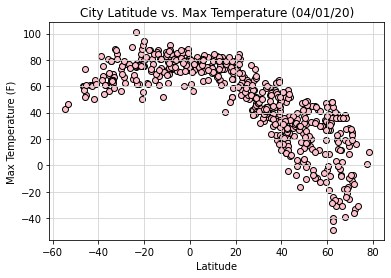

In [24]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="pink")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

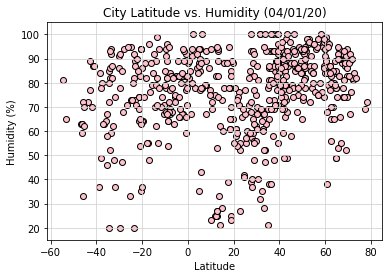

In [23]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="pink")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

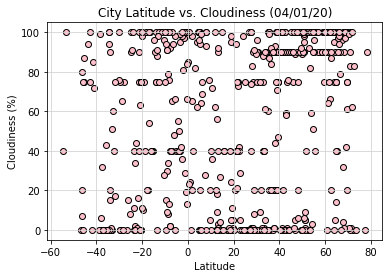

In [25]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="pink")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

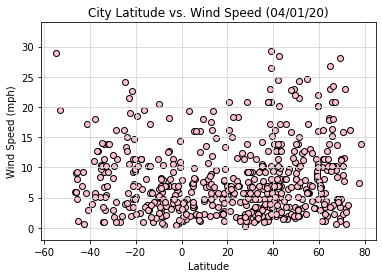

In [26]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="pink")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig4.png")
plt.show()


## Linear Regression

In [29]:
# hemisphere data frames

northern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.21x + 85.59
The r-squared is: -0.8139694125514149
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


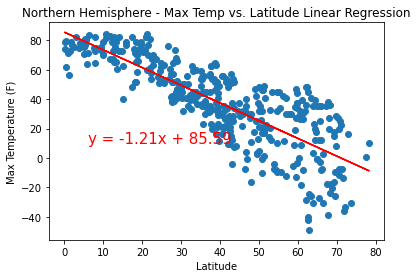

In [44]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.43x + 82.47
The r-squared is: 0.557303717974726
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


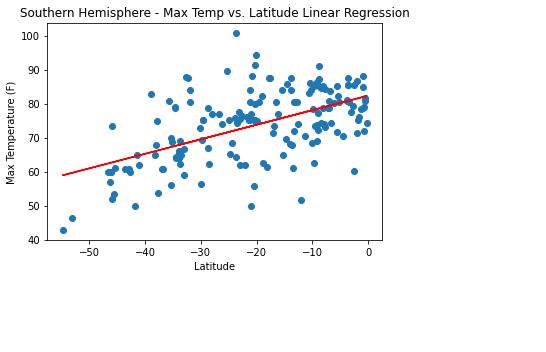

In [43]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.24x + 67.28
The r-squared is: 0.26200276592973304
The regression does not display much of a correlation between the data sets.


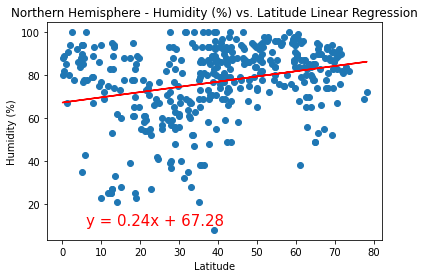

In [42]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.26x + 78.91
The r-squared is: 0.22058487901864618
The regression does not display much of a correlation between the data sets.


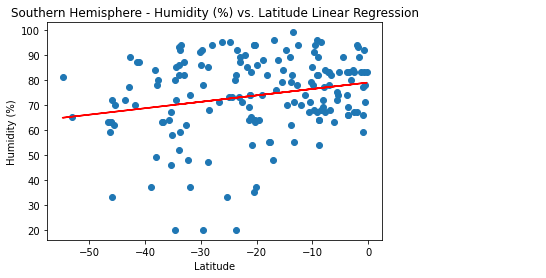

In [41]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.56x + 35.57
The r-squared is: 0.2661603382577436
The regression does not display much of a correlation between the data sets.


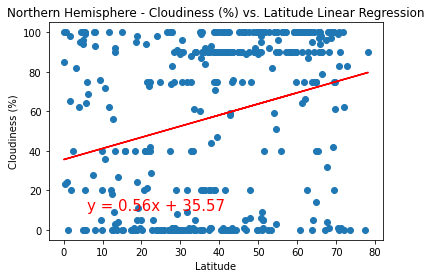

In [40]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.7x + 66.96
The r-squared is: 0.24578183553028357
The regression does not display much of a correlation between the data sets.


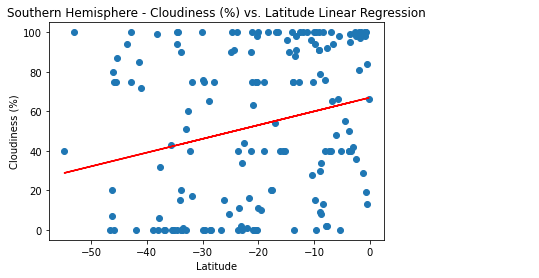

In [39]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.06x + 5.71
The r-squared is: 0.1946649071240203
The regression does not display much of a correlation between the data sets.


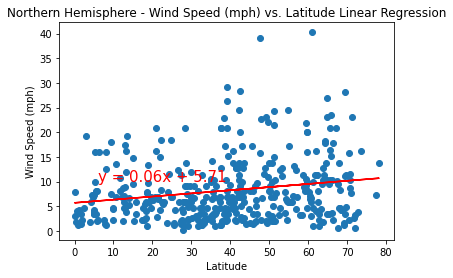

In [38]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.09x + 5.84
The r-squared is: -0.22545143361833486
The regression does not display much of a correlation between the data sets.


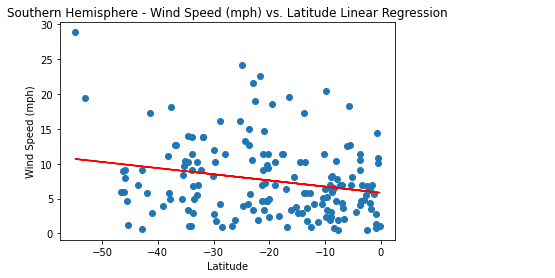

In [37]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()